First, let's take a look at the data, and see how we might answer the first question about what are the busiest times of the year to visit Seattle? By how much do prices spike?

To get started, let's read in the necessary libraries we will need to wrangle our data: pandas and numpy. If we decided to build some basic plots, matplotlib might prove useful as well.

In [3]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline

calendar = pd.read_csv('calendar.csv')

calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
calendar.shape

(1393570, 4)

In [7]:
# check na
(calendar.shape[0]-calendar.count())/calendar.shape[0]

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

Now to look at our first question of interest: **what are the busiest times of the year to visit Seattle? By how much do prices spike?** Looking at the availabel and price field, you can see how many listings availabel on each date and their responding price.  

In the above check na cell, we found out only price field has missing values, and about 32.9% of price is NA. So first we need to take care of NAs in the price field.

In [13]:
# take care of NAs in price
# will the NA in price caused by unavailability?
calendar[calendar.isnull().values==True]['available'].value_counts()

f    459028
Name: available, dtype: int64

Now we know  NA in price caused by unavailability. So we will use same listing_id's price on available date that is closest to the unavailable date to replace the NAs.

In [73]:
# fill in NA in price field
for i in range(1,calendar.shape[0]):
    if calendar.iloc[i,0]==calendar.iloc[i-1,0] and calendar.iloc[i,3] is np.NaN:
        calendar.iloc[i,3]=calendar.iloc[i-1,3]
    else:
        continue
        

In [72]:
calendar.iloc[0,3] is np.NaN

False

In order to better quantify the availability, I will replace the t with 1, f with 0 in availabel field

In [33]:
# t → 1， f → 0
calendar.loc[calendar['available']=='t','available']=1
calendar.loc[calendar['available']=='f','available']=0

# calculate on each date, how much persent of listings still available
availability=pd.pivot_table(calendar,index=['date'],values=['available'],aggfunc=np.sum)
availability['available_persent']=availability['available']/3818
availability.head()

,available,available_persent
date,,
2016-01-04,1735,0.454426
2016-01-05,1867,0.488999
2016-01-06,1826,0.478261
2016-01-07,1776,0.465165
2016-01-08,1782,0.466737


To better intuitively present the answer of what are the busiest times of the year to visit Seattle, I will draw a line graph, with X axis being the date and Y axis being the available_persent.

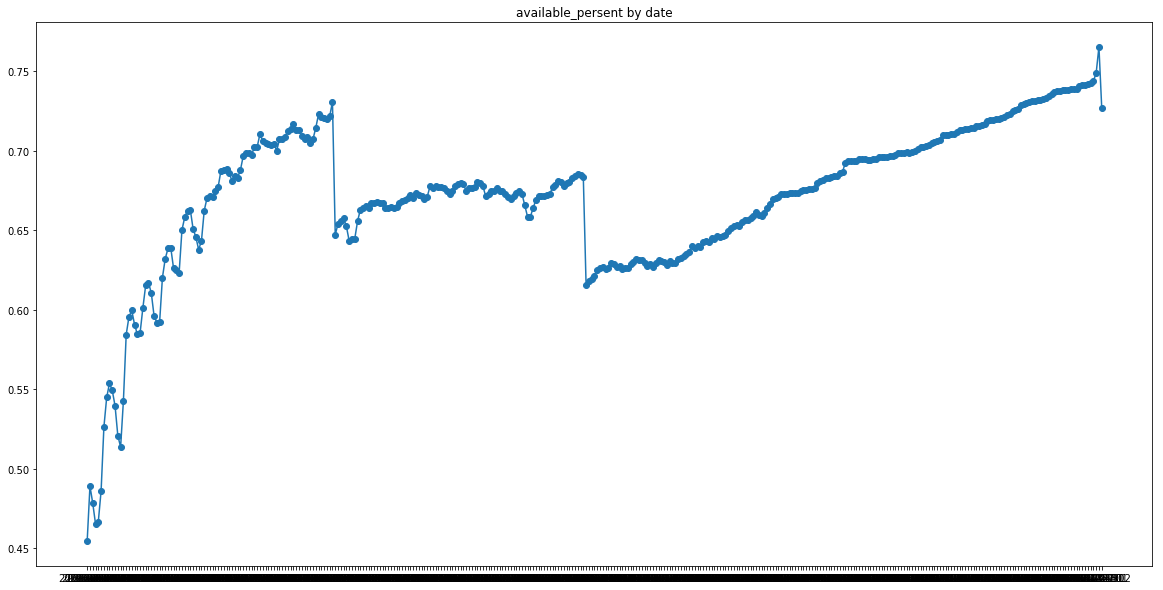

In [39]:
plt.figure(figsize=(20,10))
plt.plot(availability['available_persent'], 'o-')
plt.title('available_persent by date')
plt.show()

However, since there are too many dates in this dataset, so we can't clearly see the date information in x axis. So I decided to show available_persent by week. X axis is the week number and Y axis is the average available_persent in that week.

In [41]:
# prepare the dataset for line graph
availability['date']=availability.index
from datetime import datetime
availability['date'] = availability['date'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
availability['week']=availability['date'].apply(lambda x:x.isocalendar()[1])

In [58]:
availability_w=pd.pivot_table(availability,index=['week'],values=['available_persent'],aggfunc=np.mean)

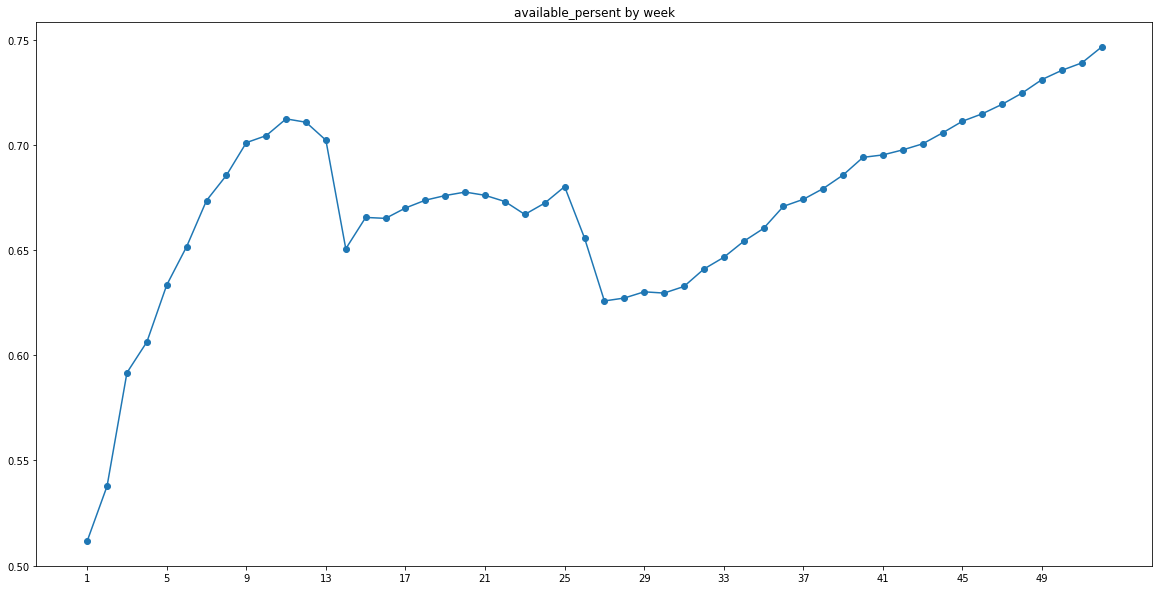

In [103]:
plt.figure(figsize=(20,10))
plt.plot(availability_w.index,availability_w['available_persent'], 'o-')
plt.xticks(np.arange(1, 52, step=4))
plt.title('available_persent by week')
plt.show()

From the aboce graph, we can observe that week1-week4(January) is the busiest season to visit Seattle because the avaiable persent level is lowest in the whole year.The second busiest seamon might be week27-week30(summer vacation).  


Next, let's see how do price change by weeks.  
If we want to calculate the average price of each date, we should only use those listings that were booked. So first we need to filter those observations whose availabel value is 0.

In [99]:
calendar['price']=calendar['price'].str.replace('$','')
calendar['price']=calendar['price'].str.replace(',','')
calendar['price']=calendar['price'].astype('float64')
price=pd.pivot_table(calendar[calendar['available']==0],index=['date'],values=['price'],aggfunc=np.mean,dropna=True)
price.head()

,price
date,
2016-01-04,NaN
2016-01-05,112.208000
2016-01-06,106.406716
2016-01-07,108.511749
2016-01-08,108.075157


In [101]:
price['date']=price.index
price['date'] = price['date'].apply(lambda x:datetime.strptime(x, '%Y-%m-%d'))
price['week']=price['date'].apply(lambda x:x.isocalendar()[1])
price_w=pd.pivot_table(price,index=['week'],values=['price'],aggfunc=np.mean)

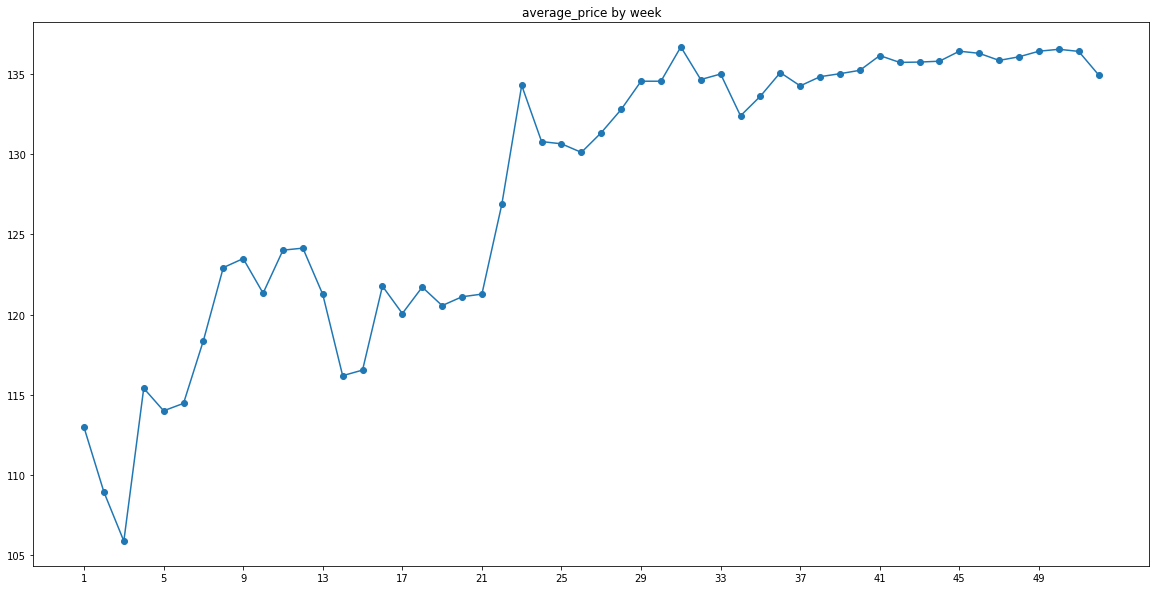

In [102]:
plt.figure(figsize=(20,10))
plt.plot(price_w.index,price_w['price'], 'o-')
plt.xticks(np.arange(1, 52, step=4))
plt.title('average_price by week')
plt.show()

Compare these two line graphs, we found some interesting thing, during the busiest season(week1-week4), the average price level is the lowest in the whole year. This phenomenon might seem counter-intuitive. Maybe people choose to visit Seattle in January because of the low housing expense?   
The second busiest season have the highest price level in the whole year, which is in line with my expectation.